running input:  CrBrS.scf.wfc30.0.in
data saved at:  CrBrS.scf.wfc30.0.out
running input:  CrBrS.scf.wfc45.0.in
data saved at:  CrBrS.scf.wfc45.0.out
running input:  CrBrS.scf.wfc60.0.in
data saved at:  CrBrS.scf.wfc60.0.out
converged wf= 60.0  led to a threshold smaller than  1e-06


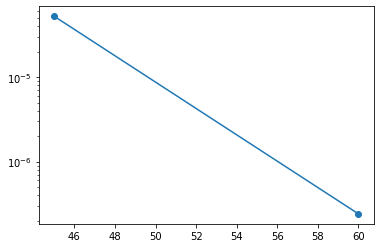

running input:  CrBrS.scf.kp1.in
data saved at:  CrBrS.scf.kp1.out
running input:  CrBrS.scf.kp6.in
data saved at:  CrBrS.scf.kp6.out
running input:  CrBrS.scf.kp11.in
data saved at:  CrBrS.scf.kp11.out
running input:  CrBrS.scf.kp16.in
data saved at:  CrBrS.scf.kp16.out
converged kp= 16  led to a threshold smaller than  1e-06


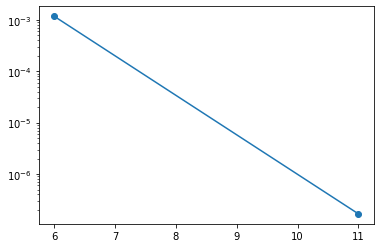

In [3]:
import qetools as qt
import numpy as np
import matplotlib.pyplot as plt


import subprocess, os
my_env = os.environ.copy()
my_env["OMP_NUM_THREADS"] = "1";

num_proc = 20;
inputf= "CrBrS.scf.in";
QEnl  = qt.read_QEnamelist(inputf);

atm_spec = [
    ["Cr", "51.996", "cr_pbe_v1.5.uspp.F.UPF"],
    ["Br", "79.901", "br_pbe_v1.4.uspp.F.UPF"],
    ["S" , "32.059", "s_pbe_v1.4.uspp.F.UPF" ],  
];

atm_pos = [
    ["Cr", [0.5,0.0,0.4509482228] ],
    ["Cr", [0.0,0.5,0.5490282197] ],
    ["Br", [0.5,0.5,0.3669391845] ],
    ["Br", [0.0,0.0,0.6330375943] ],
    ["S" , [0.0,0.0,0.4744518082] ],
    ["S" , [0.5,0.5,0.5255249704] ],
];

kpoints = [10,10,1,1,1,1];


#WFC convergence:
wfc_conv= 0;
wfc_min = 30;
wfc_max = 60;
wfcoffs = np.linspace(wfc_min, wfc_max, 3, endpoint=True );

energies=[];
filename = inputf.replace(".in","");
for wfc in wfcoffs:
    QEnl["&SYSTEM"]["ecutwfc"] = wfc; 
    QEnl["&SYSTEM"]["ecutrho"] = 10*wfc; 
    ifilename = filename+".wfc"+str(wfc)+".in";
    ofilename = filename+".wfc"+str(wfc)+".out"
    qt.write_QEnamelist(QEnl,ifilename);
    qt.write_atomic_specties(atm_spec,ifilename);
    qt.write_atomic_positions(atm_pos, ifilename);
    qt.write_kpoints(kpoints, ifilename);

    print("running input: ",ifilename);
    #ofile = open(ofilename, "w")
    #subprocess.run(["mpirun", "-np", str(num_proc), "pw.x", "-inp", ifilename], stdout=ofile, env=my_env);
    #ofile.close();
    print("data saved at: ",ofilename);

    energy = qt.read_finalenergy(ofilename);
    energies.append(energy);
    
    tol = 1e-6;
    if qt.is_converged( energies, tol=tol):
        print("converged wf=",wfc," led to a threshold smaller than ", tol)
        wfc_conv = wfc;
        break;

qt.plot_conv(wfcoffs,energies, "wfc_convergence.pdf");
plt.show()

#KPOINT convergence:
kp_conv= 0;

kpmin = 1;
kpmax = 100;
kps   = np.arange(kpmin,kpmax, 5 );

kshift= 0 
energies=[];
filename = inputf.replace(".in","");
for kp in kps:
    QEnl["&SYSTEM"]["ecutwfc"] = wfc_conv;
    QEnl["&SYSTEM"]["ecutrho"] = 10*wfc_conv; 
    ifilename = filename+".kp"+str(kp)+".in";
    ofilename = filename+".kp"+str(kp)+".out";
    qt.write_QEnamelist(QEnl,ifilename);
    qt.write_atomic_specties(atm_spec,ifilename);
    qt.write_atomic_positions(atm_pos, ifilename);
    #Change shift
    kpoints = [kp,kp,1,kshift,kshift,kshift];
    qt.write_kpoints(kpoints, ifilename);
    print("running input: ",ifilename);
    #ofile = open(ofilename, "w")
    #subprocess.run(["mpirun", "-np", str(num_proc), "pw.x", "-inp", ifilename], stdout=ofile, env=my_env);
    #ofile.close();
    print("data saved at: ",ofilename);

    tol = 1e-6;
    if qt.is_converged( energies, tol=tol):
        kp_conv = kp;
        print("converged kp=",kp_conv," led to a threshold smaller than ", tol)
        break;
        
    energy = qt.read_finalenergy(ofilename);
    energies.append(energy);

qt.plot_conv(kps,energies, "kp_convergence.pdf");



In [21]:

#KPOINT convergence:
kp_conv= 0;

kpmin = 1;
kpmax = 100;
kps   = np.arange(kpmin,kpmax, 5 );

kshift= 0 
energies=[];
filename = inputf.replace(".in","");
for kp in kps:
    QEnl["&SYSTEM"]["ecutwfc"] = wfc_conv;
    QEnl["&SYSTEM"]["ecutrho"] = 10*wfc_conv; 
    ifilename = filename+".kp"+str(kp)+".in";
    ofilename = filename+".kp"+str(kp)+".out";
    qt.write_QEnamelist(QEnl,ifilename);
    qt.write_atomic_specties(atm_spec,ifilename);
    qt.write_atomic_positions(atm_pos, ifilename);
    #Change shift
    kpoints = [kp,kp,1,kshift,kshift,kshift];
    qt.write_kpoints(kpoints, ifilename);
    print("running input: ",ifilename);
    #ofile = open(ofilename, "w")
    #subprocess.run(["mpirun", "-np", str(num_proc), "pw.x", "-inp", ifilename], stdout=ofile, env=my_env);
    #ofile.close();
    print("data saved at: ",ofilename);

    tol = 1e-6;
    if qt.is_converged( energies, tol=tol):
        kp_conv = kp;
        print("converged kp=",kp_conv," led to a threshold smaller than ", tol)
        
        break;
        
    energy = qt.read_finalenergy(ofilename);
    energies.append(energy);

print(kps)
qt.plot_conv(kps,energies, "kp_convergence.pdf");

print("FINISHED")


running input:  CrBrS.scf.kp1.in
data saved at:  CrBrS.scf.kp1.out
running input:  CrBrS.scf.kp6.in
data saved at:  CrBrS.scf.kp6.out
running input:  CrBrS.scf.kp11.in
data saved at:  CrBrS.scf.kp11.out
running input:  CrBrS.scf.kp16.in
data saved at:  CrBrS.scf.kp16.out
converged kp= 16  led to a threshold smaller than  1e-06
[ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 20 but corresponding boolean dimension is 3

In [13]:
#Lattice constant convergence:
kp_conv= 0;

kpmin = 1;
kpmax = 100;
kps   = np.arange(kpmin,kpmax, 5 );

kshift= 0 
energies=[];
filename = inputf.replace(".in","");
for kp in kps:
    QEnl["&SYSTEM"]["ecutwfc"] = wfc_conv;
    QEnl["&SYSTEM"]["ecutrho"] = 10*wfc_conv; 
    ifilename = filename+".kp"+str(kp)+".in";
    ofilename = filename+".kp"+str(kp)+".out";
    qt.write_QEnamelist(QEnl,ifilename);
    qt.write_atomic_specties(atm_spec,ifilename);
    qt.write_atomic_positions(atm_pos, ifilename);
    #Change shift
    kpoints = [kp,kp,1,kshift,kshift,kshift];
    qt.write_kpoints(kpoints, ifilename);
    print("running input: ",ifilename);
    ofile = open(ofilename, "w")
    subprocess.run(["mpirun", "-np", str(num_proc), "pw.x", "-inp", ifilename], stdout=ofile, env=my_env);
    ofile.close();
    print("data saved at: ",ofilename);

    tol = 1e-6;
    if qt.is_converged( energies, tol=tol):
        kp_conv = kp;
        print("converged kp=",kp_conv," led to a threshold smaller than ", tol)
        break;
        
    energy = qt.read_finalenergy(ofilename);
    energies.append(energy);

qt.plot_wfcconv(kps,energies, "kp_convergence.pdf");

print("FINISHED")

In [14]:
kps

array([ 1,  6, 11, 16, 21, 26])

In [19]:
kp_conv

16